In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate mock data
def generate_mock_data(start_date, end_date):
    date_range = pd.date_range(start=start_date, end=end_date)
    data = {
        'Date': date_range,
        'Temperature': np.random.randint(25, 40, size=len(date_range)),
        'Humidity': np.random.randint(30, 80, size=len(date_range)),
        'WindSpeed': np.random.randint(0, 15, size=len(date_range)),
    }
    df = pd.DataFrame(data)
    df['HeatWave'] = (df['Temperature'] > 30).astype(int)
    return df

# Generate data from 2023-01-01 to 2023-12-31
mock_data = generate_mock_data('2023-01-01', '2023-12-31')
mock_data.to_csv('weather_data.csv', index=False)

print(mock_data.head())


        Date  Temperature  Humidity  WindSpeed  HeatWave
0 2023-01-01           28        53          3         0
1 2023-01-02           30        54          1         0
2 2023-01-03           31        31          4         1
3 2023-01-04           31        48          4         1
4 2023-01-05           26        43          3         0


         Date  Temperature  Humidity  WindSpeed  HeatWave
0  2023-01-01           28        53          3         0
1  2023-01-02           30        54          1         0
2  2023-01-03           31        31          4         1
3  2023-01-04           31        48          4         1
4  2023-01-05           26        43          3         0
       Temperature    Humidity   WindSpeed    HeatWave
count   365.000000  365.000000  365.000000  365.000000
mean     31.654795   54.986301    6.654795    0.561644
std       4.276984   14.830446    4.314079    0.496867
min      25.000000   30.000000    0.000000    0.000000
25%      28.000000   42.000000    3.000000    0.000000
50%      31.000000   55.000000    7.000000    1.000000
75%      35.000000   69.000000   10.000000    1.000000
max      39.000000   79.000000   14.000000    1.000000


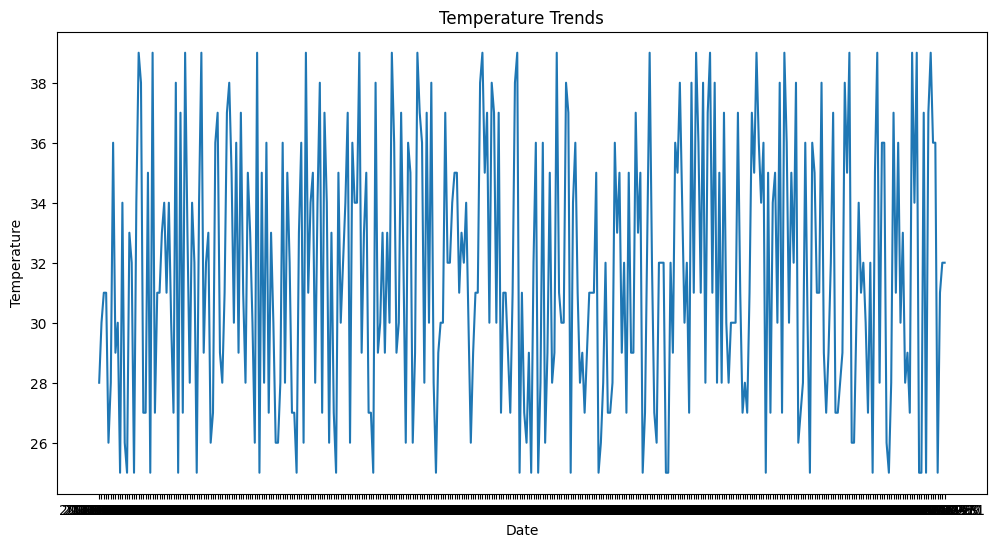

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('weather_data.csv')

# Basic analysis
print(data.head())
print(data.describe())

# Plot temperature trends
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Temperature'])
plt.title('Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import joblib

# Load and preprocess data
data = pd.read_csv('weather_data.csv')
data['HeatWave'] = data['Temperature'] > 30  # Example condition for heat wave

# Features and target
X = data[['Temperature', 'Humidity']]
y = data['HeatWave']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(model, 'heat_wave_model.pkl')
print("Model saved as heat_wave_model.pkl")

# Load the model
loaded_model = joblib.load('heat_wave_model.pkl')
print("Model loaded from heat_wave_model.pkl")

# Example usage
example_data = [[35, 45]]  # Example input: Temperature=35, Humidity=45
prediction = loaded_model.predict(example_data)
print(f"Heat wave prediction for {example_data}: {prediction[0]}")


              precision    recall  f1-score   support

       False       1.00      1.00      1.00        55
        True       1.00      1.00      1.00        55

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

Model saved as heat_wave_model.pkl
Model loaded from heat_wave_model.pkl
Heat wave prediction for [[35, 45]]: True


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [5]:
pip install flask


In [11]:
%%writefile app.py

from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('heat_wave_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    temperature = data.get('temperature')
    humidity = data.get('humidity')

    if temperature is None or humidity is None:
        return jsonify({'error': 'Invalid input'}), 400

    input_data = [[temperature, humidity]]
    prediction = model.predict(input_data)

    return jsonify({'heat_wave': bool(prediction[0])})

if __name__ == '__main__':
    app.run()


Overwriting app.py


In [12]:
import joblib
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a simple model
X_train = np.array([[30, 50], [35, 45], [25, 60], [40, 40], [28, 55]])
y_train = np.array([0, 1, 0, 1, 0])

model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'heat_wave_model.pkl')


['heat_wave_model.pkl']

In [17]:
!pip install flask pyngrok joblib


In [20]:
from pyngrok import ngrok

# Use your own authtoken from ngrok dashboard
authtoken = '2jWlOfAx4pDpIleu6rbCvhxeOWd_7oT2pLVjm1ncYDX2YYVnw'
ngrok.set_auth_token(authtoken)

In [21]:

from pyngrok import ngrok

# Start ngrok
public_url = ngrok.connect(port='5000')
print(f"Public URL: {public_url}")


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [10]:
!curl -X POST -H "Content-Type: application/json" -d '{"temperature": 35, "humidity": 45}' http://127.0.0.1:5000/predict


curl: (7) Failed to connect to 127.0.0.1 port 5000 after 0 ms: Connection refused


In [22]:
# Step 1: Install necessary packages
!pip install flask pyngrok joblib









UsageError: Line magic function `%%writefile` not found.


In [24]:
# Step 2: Authenticate ngrok
from pyngrok import ngrok

# Use your own authtoken from ngrok dashboard
authtoken = '2jWlOfAx4pDpIleu6rbCvhxeOWd_7oT2pLVjm1ncYDX2YYVnw'
ngrok.set_auth_token(authtoken)

In [25]:
# Step 3: Write the Flask app code to a file
%%writefile app.py

from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('heat_wave_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    temperature = data.get('temperature')
    humidity = data.get('humidity')

    if temperature is None or humidity is None:
        return jsonify({'error': 'Invalid input'}), 400

    input_data = [[temperature, humidity]]
    prediction = model.predict(input_data)

    return jsonify({'heat_wave': bool(prediction[0])})

if __name__ == '__main__':
    app.run()

Overwriting app.py


In [26]:
# Step 4: Create and save a mock model if not already saved
import joblib
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a simple model
X_train = np.array([[30, 50], [35, 45], [25, 60], [40, 40], [28, 55]])
y_train = np.array([0, 1, 0, 1, 0])

model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'heat_wave_model.pkl')


['heat_wave_model.pkl']

In [27]:
# Step 5: Run the Flask app in the background
get_ipython().system_raw('python app.py &')

In [31]:
# Step 6: Expose the Flask app using ngrok
# Start ngrok tunnel on port 5000
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://7f98-34-134-204-135.ngrok-free.app" -> "http://localhost:5000"


In [30]:
import requests

# Make sure to format the URL correctly
url = f"{public_url}/predict"
data = {
    'temperature': 35,
    'humidity': 45
}

response = requests.post(url, json=data)
print(response.json())


InvalidSchema: No connection adapters were found for 'NgrokTunnel: "https://16e5-34-134-204-135.ngrok-free.app" -> "http://localhost:5000"/predict'